In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ["Sepal_length", "Sepal_width", "Petal_length","Petal_width"]
iris_df["Species"] = iris.target
X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

## K-means Clustering

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 실제 Label과 비교

In [3]:
?KMeans

In [15]:
from sklearn.cluster import KMeans
kmeans0 = KMeans(n_clusters=3, random_state=0).fit(X)

In [16]:
# Plot the training points
iris_label = iris_df.copy()
iris_label["type"] = "label"
iris_cluster = iris_df.copy()
iris_cluster["Species"] = kmeans.labels_
iris_cluster["type"] = "cluster"

iris_all = iris_label.append(iris_cluster)
iris_all = iris_all.reset_index()
iris_all.info()
iris_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
index           300 non-null int64
Sepal_length    300 non-null float64
Sepal_width     300 non-null float64
Petal_length    300 non-null float64
Petal_width     300 non-null float64
Species         300 non-null int32
type            300 non-null object
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 14.1+ KB


,index,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,type
0,0,5.1,3.5,1.4,0.2,0,label
1,1,4.9,3.0,1.4,0.2,0,label
2,2,4.7,3.2,1.3,0.2,0,label
3,3,4.6,3.1,1.5,0.2,0,label
4,4,5.0,3.6,1.4,0.2,0,label


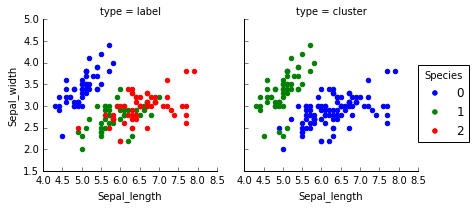

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

grid = sns.FacetGrid(iris_all, col='type', hue='Species')
# grid = sns.FacetGrid(train_df, col='Survived',
#                      row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.scatter, "Sepal_length", "Sepal_width")
grid.add_legend()

### Kmeans 초기값에 따른 결과 비교

In [86]:
?KMeans

In [7]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=3, random_state=2, init="random", n_init=1).fit(X)
kmeans4 = KMeans(n_clusters=3, random_state=4, init="random", n_init=1).fit(X)

In [8]:
pd.DataFrame([kmeans2.labels_, kmeans4.labels_]).T

,0,1
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
5,0,1
6,1,1
7,0,1
8,1,1
9,1,1


In [9]:
# Plot the training points
iris_cluster2 = iris_df.copy()
iris_cluster2["Species"] = kmeans0.labels_
iris_cluster2["type"] = "cluster2"
iris_cluster4 = iris_df.copy()
iris_cluster4["Species"] = kmeans4.labels_
iris_cluster4["type"] = "cluster4"

iris_all = iris_cluster2.append(iris_cluster4)
iris_all = iris_all.reset_index()
iris_all.info()
iris_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
index           300 non-null int64
Sepal_length    300 non-null float64
Sepal_width     300 non-null float64
Petal_length    300 non-null float64
Petal_width     300 non-null float64
Species         300 non-null int32
type            300 non-null object
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 14.1+ KB


,index,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,type
0,0,5.1,3.5,1.4,0.2,1,cluster2
1,1,4.9,3.0,1.4,0.2,1,cluster2
2,2,4.7,3.2,1.3,0.2,1,cluster2
3,3,4.6,3.1,1.5,0.2,1,cluster2
4,4,5.0,3.6,1.4,0.2,1,cluster2


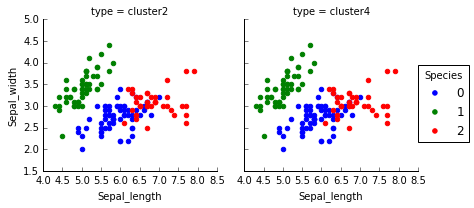

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

grid = sns.FacetGrid(iris_all, col='type', hue='Species')
# grid = sns.FacetGrid(train_df, col='Survived',
#                      row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.scatter, "Sepal_length", "Sepal_width")
grid.add_legend()

## Hierarchical Clustering

In [20]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X)

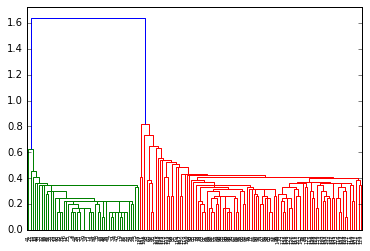

In [21]:
plt.figure()
dn=hierarchy.dendrogram(Z)